In [28]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [31]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [32]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [33]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [34]:
# Save references to each table
Measurement =  Base.classes.measurement
Station =  Base.classes.station

In [35]:
# Create our session (link) from Python to the DB
session=Session(bind=engine)

# Exploratory Precipitation Analysis

In [36]:
from sqlalchemy import inspect
inspector = inspect(engine)
inspector.__dir__()

['bind',
 'engine',
 '_op_context_requires_connect',
 'dialect',
 'info_cache',
 '__module__',
 '__doc__',
 '__init__',
 '_construct',
 '_init_legacy',
 '_init_engine',
 '_init_connection',
 'from_engine',
 '_connectable_insp',
 '_engine_insp',
 '_connection_insp',
 '_operation_context',
 '_inspection_context',
 'default_schema_name',
 'get_schema_names',
 'get_table_names',
 'has_table',
 'has_sequence',
 'get_sorted_table_and_fkc_names',
 'get_temp_table_names',
 'get_temp_view_names',
 'get_table_options',
 'get_view_names',
 'get_sequence_names',
 'get_view_definition',
 'get_columns',
 'get_pk_constraint',
 'get_foreign_keys',
 'get_indexes',
 'get_unique_constraints',
 'get_table_comment',
 'get_check_constraints',
 'reflecttable',
 'reflect_table',
 '_reflect_column',
 '_reflect_col_sequence',
 '_reflect_pk',
 '_reflect_fk',
 '_index_sort_exprs',
 '_reflect_indexes',
 '_reflect_unique_constraints',
 '_reflect_check_constraints',
 '_reflect_table_comment',
 '__dict__',
 '__weakre

In [37]:
columns_measurement = inspector.get_columns('measurement')
for column in columns_measurement:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [38]:
columns_station = inspector.get_columns('station')
for column in columns_station:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [39]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [40]:
# Calculating the date 1year before from the last date in the data set

one_year_before_date = (dt.datetime.strptime(recent_date[0], '%Y-%m-%d') - dt.timedelta(days=365)).date()
one_year_before_date

datetime.date(2016, 8, 23)

In [41]:
# Query to get the date and precipitation for last 12 months
prcp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_before_date).all()
prcp_results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [42]:
# Saving results in a pandas dataframe and sorting on date

prcp_df = pd.DataFrame(prcp_results, columns = ['Date', 'Precipitation'])
prcp_df = prcp_df.sort_values('Date', ascending=True).reset_index(drop=True)
prcp_df.head(10)

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,NaN
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15
5,2016-08-23,0.70
6,2016-08-23,0.02
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28


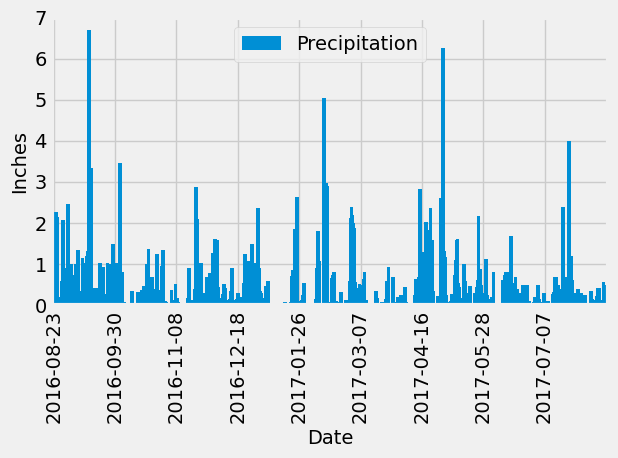

In [43]:
# Plotting data with Pandas and Matplotlib
xtick_pos = np.linspace(0, prcp_df.shape[0]-1, 9, endpoint=False, dtype=int)
xtick_labels = [prcp_df['Date'][i] for i in xtick_pos]
ax = prcp_df.plot.bar('Date', 'Precipitation', ylabel='Inches', width=15, ylim= (0,7), rot=90)
ax.set_xticks(xtick_pos)
ax.set_xticklabels(xtick_labels)
plt.tight_layout()
plt.show()

In [44]:
# Displaying the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [19]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(func.Distinct(Measurement.station))).first()

(9,)

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station))\
                         .group_by(Measurement.station)\
                         .order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.Min(Measurement.tobs), func.Max(Measurement.tobs), func.avg(Measurement.tobs))\
       .filter(Measurement.station == active_stations[0][0]).first()

(54.0, 85.0, 71.66378066378067)

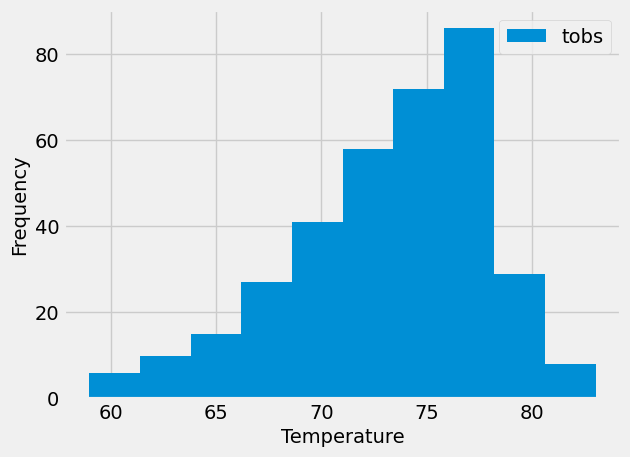

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_results = session.query(Measurement.tobs).filter(Measurement.station == active_stations[0][0], Measurement.date >= one_year_before_date).all()
temp_values =  [temp_results[i][0] for i in range(len(temp_results))]
plt.hist(temp_values, bins=10, label='tobs')
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

# Close Session

In [23]:
# Close Session
session.close()

In [58]:
results_2 = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= '2017-01-01').all()
results_2


[('2017-01-01', 62.0),
 ('2017-01-02', 66.0),
 ('2017-01-03', 63.0),
 ('2017-01-04', 62.0),
 ('2017-01-05', 63.0),
 ('2017-01-06', 64.0),
 ('2017-01-07', 66.0),
 ('2017-01-08', 60.0),
 ('2017-01-09', 64.0),
 ('2017-01-10', 63.0),
 ('2017-01-11', 78.0),
 ('2017-01-12', 67.0),
 ('2017-01-13', 67.0),
 ('2017-01-14', 65.0),
 ('2017-01-15', 66.0),
 ('2017-01-16', 67.0),
 ('2017-01-17', 66.0),
 ('2017-01-18', 72.0),
 ('2017-01-19', 73.0),
 ('2017-01-20', 71.0),
 ('2017-01-21', 72.0),
 ('2017-01-22', 72.0),
 ('2017-01-23', 72.0),
 ('2017-01-24', 69.0),
 ('2017-01-25', 72.0),
 ('2017-01-26', 71.0),
 ('2017-01-27', 65.0),
 ('2017-01-28', 64.0),
 ('2017-01-29', 67.0),
 ('2017-01-30', 67.0),
 ('2017-01-31', 68.0),
 ('2017-02-01', 70.0),
 ('2017-02-02', 61.0),
 ('2017-02-03', 65.0),
 ('2017-02-04', 72.0),
 ('2017-02-05', 73.0),
 ('2017-02-06', 76.0),
 ('2017-02-07', 64.0),
 ('2017-02-08', 62.0),
 ('2017-02-09', 61.0),
 ('2017-02-10', 71.0),
 ('2017-02-11', 69.0),
 ('2017-02-12', 68.0),
 ('2017-02-